**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Juan Roman Torres

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [5]:
from google.colab import files
files.upload()

df_happiness = pd.read_csv('happiness_report.csv')

df_happiness.head()



Saving happiness_report.csv to happiness_report.csv


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [ ]:
mexico = df_happiness[(df_happiness['Country or region']=='Mexico')]
mexico.set_index('Country or region',inplace=True)
mexico 

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

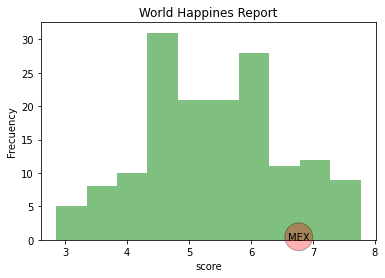

In [ ]:
plt.hist( df_happiness['Score'],facecolor='g',alpha=0.5)

#props_bbox= {'boxstyle':'circle','facecolor':'red','apha':0.3 }

plt.text(6.595,0,'MEX',bbox={'boxstyle':'circle','facecolor':'red','alpha':0.3})
plt.xlabel('score')
plt.ylabel('Frecuency')
plt.title('World Happines Report')
plt.show()
        

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

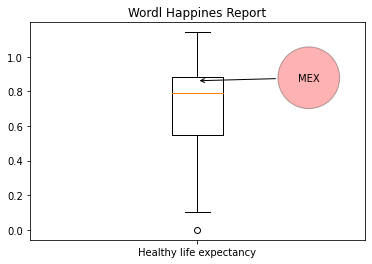

In [ ]:
plt.boxplot(df_happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'] ,color)
plt.title('Wordl Happines Report')

mex_value = mexico.loc['Mexico','Healthy life expectancy']

plt.annotate('MEX',xy=(1,mex_value ) , xytext=(1.30,mex_value),arrowprops=dict(arrowstyle='->',color='black'),bbox=dict( boxstyle='circle', facecolor='red',alpha=0.3,pad=2,))

plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

Country or region             Mexico
GDP per capita                 1.070
Social support                 1.323
Healthy life expectancy        0.861
Freedom to make life choices   0.433
Generosity                     0.074
Perceptions of corruption      0.073


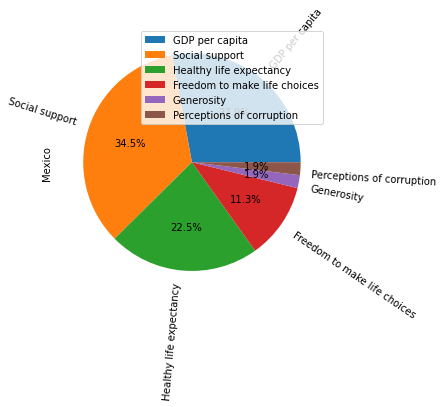

In [ ]:
mexico = df_happiness[(df_happiness['Country or region']=='Mexico')]
mexico = mexico.drop('Overall rank',axis=1)
mexico = mexico.drop('Score',axis=1)
mexico.set_index('Country or region',inplace=True)
mexico_t = mexico.T
mexico_t
mexico_t.plot.pie(y='Mexico',labels=mexico_t.index,rotatelabels=True,figsize=(5,5),autopct='%1.1f%%')

print(mexico_t)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

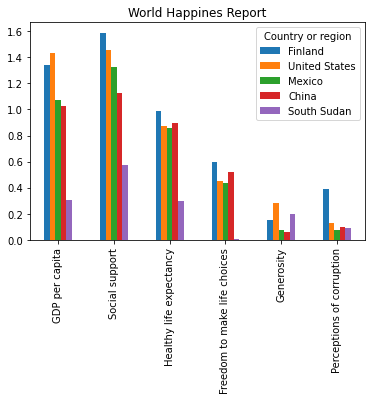

In [ ]:
#print (df_happiness)


paises = df_happiness[(df_happiness['Country or region']=='Mexico')| (df_happiness['Country or region']=='Finland')| (df_happiness['Country or region']=='China')| 
                      (df_happiness['Country or region']=='United States')|(df_happiness['Country or region']=='South Sudan')]
paises.set_index('Country or region',inplace=True)
paises
paises =paises.drop('Overall rank',axis=1)
paises =paises.drop('Score',axis=1)
paises_t =paises.T

paises_t

paises_t.plot.bar(title='World Happines Report')



8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

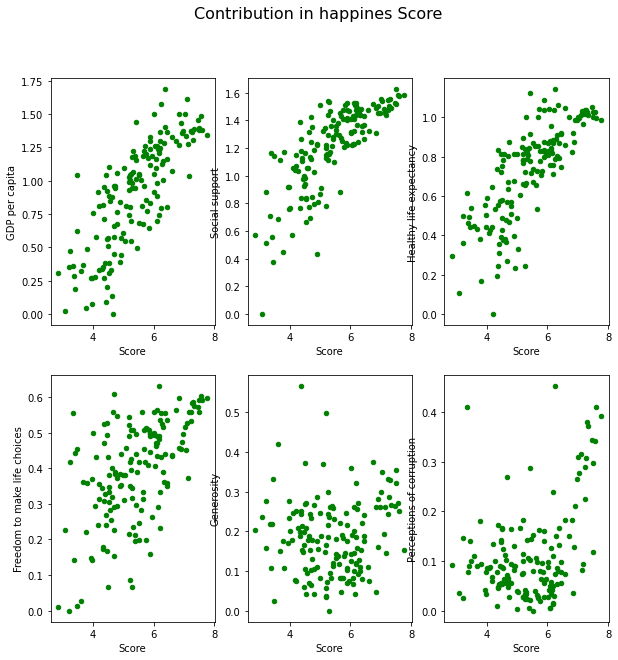

In [ ]:
fig,axs = plt.subplots(2,3,figsize=(10,10))


fig.suptitle('Contribution in happines Score ',fontsize=16) 

df_happiness.plot(kind='scatter',x='Score',y='GDP per capita',color='green',ax=axs[0,0])
df_happiness.plot(kind='scatter',x='Score',y='Social support',color='green',ax=axs[0,1])
df_happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='green',ax=axs[0,2])
df_happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices',color='green',ax=axs[1,0])
df_happiness.plot(kind='scatter',x='Score',y='Generosity',color='green',ax=axs[1,1])
df_happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption',color='green',ax=axs[1,2])










9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

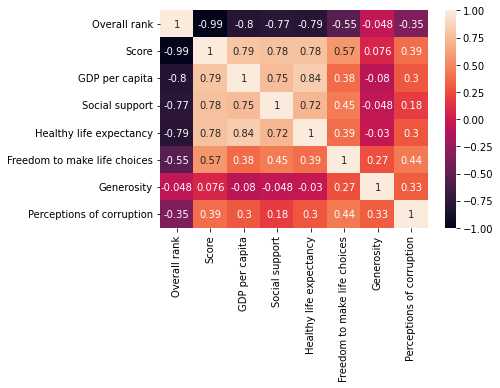

In [ ]:
data_heat_map = df_happiness.drop('Overall rank',axis=1)
data_heat_map
heatmap = sns.heatmap(df_happiness.corr(), vmin=-1, vmax=1, annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [4]:
from google.colab import files
files.upload()

df_metadata = pd.read_csv('Metadata.csv')

#df_metadata.head()

df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   217 non-null    object
 3   SpecialNotes  94 non-null     object
 4   TableName     263 non-null    object
dtypes: object(5)
memory usage: 10.4+ KB


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

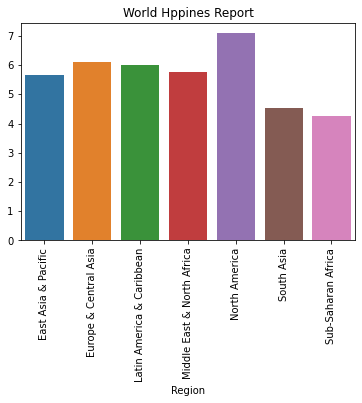

In [23]:
info_region = df_happiness.merge(df_metadata,left_on='Country or region',right_on='TableName')

info_region_chart = info_region[['Region','Score']].groupby(['Region']).mean()
info_region_chart

sns.barplot(x=info_region_chart.index,y='Score',data=info_region_chart)
plt.title('World Hppines Report')
plt.ylabel('')
plt.xticks(rotation=90)















